# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#importing the necessary librairies
import pandas as pd
import numpy as np
import requests
import tweepy 
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import functools
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the twitter-archive-enhanced.csv file into a dataframe
df_archived = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Retrieve image-predictions.tsv file
image_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv', 'wb') as imageX:
    image_gathered = requests.get(image_url)
    imageX.write(image_gathered.content)

In [4]:
#loading the image prediction data into a dataframe
df_pred = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# getting the essential credentials
consumer_key = '...'
consumer_secret = '...'
access_token = '...'
access_secret = '...'

In [6]:
# Creating tweepy api object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
"""with open('tweet_json1.txt', 'w') as tweet_data_file:
    for tweet_id in df_archived:
        try:
            tweet_data = api.get_status(tweet_id, tweet_mode='extended')
        except tweepy.TweepError:
            pass
        else:
            tweet_data_file.write(json.dumps(tweet_data._json) + '\n')
print('Done........')"""

"with open('tweet_json1.txt', 'w') as tweet_data_file:\n    for tweet_id in df_archived:\n        try:\n            tweet_data = api.get_status(tweet_id, tweet_mode='extended')\n        except tweepy.TweepError:\n            pass\n        else:\n            tweet_data_file.write(json.dumps(tweet_data._json) + '\n')\nprint('Done........')"

In [ ]:
#Getting the tweet data for each tweet id and putting it into a dataframe
with open('tweet_json.txt') as f:
    df_json = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count', 'created_at'])

df_json.columns = ['tweet_id', 'favorites', 'retweets', 'date_created']
df_json.set_index('tweet_id', inplace = True)
df_json.head()

## Assessing Data


### Tweet Archived Data

#### 1. Visual assessment

In [9]:
#Let's have a look at our data first
df_archived.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. Programmatic Assessment

In [10]:
#Let's have a look at the summary of our dataframe.
df_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
#Let's know the differnt values of the column name.
df_archived.name.value_counts().head(50)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Lola        10
Penny       10
Winston      9
Bo           9
the          8
Sadie        8
Toby         7
Daisy        7
Bailey       7
an           7
Buddy        7
Bella        6
Scout        6
Rusty        6
Jax          6
Dave         6
Stanley      6
Oscar        6
Milo         6
Jack         6
Koda         6
Leo          6
Sunny        5
Oakley       5
George       5
Bentley      5
Sammy        5
Larry        5
very         5
Gus          5
Alfie        5
Chester      5
Finn         5
Phil         5
Louis        5
Archie       4
Chip         4
Maddie       4
Jerry        4
Shadow       4
Duke         4
Cassie       4
quite        4
Name: name, dtype: int64

In [12]:
#few statistics about the numerical data in our datframe.
df_archived.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
#check is there any duplicated data.
df_archived.duplicated().sum()

0

In [14]:
#check the different values in the rating_numerator.
df_archived['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

#### 3. Conclusion


From the first look whether visually or with the help of pandas .info() we can conclude that the dataset contains so many missing values yet this is unclenable for now.
We can conclude also that the retweeted columns and in_reply columns contain non null values but we are interested only in original tweets.
Although .info() showed that there is no missing data in the column name, we can distinguish that there is yet encoded as the string 'None'. Again with the column name we can see that it contains words that are clearly not names (e.g the, very, a ..) and luckily our dataset do not have duplicated data.
There are non-null values in all of the retweeted_ columns and the in_reply columns, so the rows containing these values will need to be removed. Another Surprising things people give more than 10 as rating numerator.

### Image Prediction Data

#### 1. Visual assessment

In [15]:
df_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### 2. Programmatic Assessment

In [16]:
#Let's have a look at the summary of our dataframe.
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
#checking if there are some tweets with the same jpg url.
df_pred[df_pred['jpg_url'] == 'https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
800,691416866452082688,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True
1624,803692223237865472,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True


#### 3. Conclusion

We can distinguish some quality issues like the underscore in the p1, p2, p3 columns. There are also some tweets with the same jpg_url. Also, problems with the names of the columns. As we know this dataset is a prediction using 3 different algorithms to know the dog race. 

### JSON Data

#### 1. Visual assessment

In [18]:
df_json

,favorites,retweets,date_created
tweet_id,,,
892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017
892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017
891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017
891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017
891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017
891087950875897856,20562,3261,Sat Jul 29 00:08:17 +0000 2017
890971913173991426,12041,2158,Fri Jul 28 16:27:12 +0000 2017
890729181411237888,56848,16716,Fri Jul 28 00:22:40 +0000 2017
890609185150312448,28226,4429,Thu Jul 27 16:25:51 +0000 2017


#### 2. Programmatic Assessment

In [19]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 3 columns):
favorites       2354 non-null int64
retweets        2354 non-null int64
date_created    2354 non-null object
dtypes: int64(2), object(1)
memory usage: 73.6+ KB


In [20]:
df_json.duplicated().sum()

0

#### 3. Conclusion

 There is no quality data issues related to the json_data but when it comes to tidiness issues, It's better to add the retweet_count and favorite_count columns to the tweet_archived_data.

### Quality issues

1. The column **name** contains words that are not names (e.g the, very, a ..)

2. The **source** column contains HTML tags.

3. The **timestamp** columns are in string format (object)

4. The columns **p1, p2, p3** have words combined using underscore_

5. There are non-null values in all of the **retweeted_ columns** (181)

6. There are non-null values in all of the **in_reply_to_status_id and in_reply_to_user_id.** (78)

7. Droppingg unnecessary columns such as **retweeted_ columns** and **in_reply_to_status_id and in_reply_to_user_id**

8. In the **name column** null objects are non-null (None to NaN)


### Tidiness issues
1. We have four columns (dogo, floofer, pupper, puppo) which are dogs stages can be unified into one column.

2. Dog Breed Predictions with the highest confidence should be combined with tweet_data_archived

3. retweet_count and favorite_count should be part of tweet_data_archived

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original pieces of data
df_archived_clean = df_archived.copy()
df_pred_clean = df_pred.copy()
df_json_clean = df_json.copy()

## Quality issues

### Issue #1:

#### Define: 
We will be looking for words in lowercase in the name column. Then change it to None. Try to figure out its name in the text field (search by 'named' or 'This is',...), Change the rest to NaN.

#### Code

In [22]:
# list all names that are lowercased and sort them
low_names = df_archived_clean.name.str.contains('^[a-z]', regex = True)
df_archived_clean[low_names].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [23]:
low_names_list = df_archived_clean[low_names].name.values

In [24]:
# convert a series into a list 
low_names_list = [*set(low_names_list)]

In [25]:
low_names_list

['very',
 'officially',
 'getting',
 'a',
 'old',
 'light',
 'my',
 'life',
 'his',
 'an',
 'one',
 'not',
 'the',
 'space',
 'by',
 'incredibly',
 'this',
 'such',
 'unacceptable',
 'actually',
 'all',
 'mad',
 'quite',
 'just',
 'infuriating']

In [26]:
#Replace all the lowercase names into none
for i in low_names_list:
    df_archived_clean.name = df_archived_clean.name.replace( i , np.nan)

In [27]:
df_archived_clean.name.isna().sum()

109

In [28]:
df_archived_clean.name.value_counts()

None         745
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
Sadie          8
Daisy          7
Bailey         7
Toby           7
Buddy          7
Koda           6
Jax            6
Leo            6
Bella          6
Jack           6
Dave           6
Rusty          6
Scout          6
Oscar          6
Milo           6
Stanley        6
Oakley         5
George         5
Sunny          5
Larry          5
            ... 
Yoda           1
Sprout         1
Godzilla       1
Ulysses        1
Tycho          1
Bayley         1
Harvey         1
DonDon         1
Ralpher        1
Bronte         1
Tebow          1
Brat           1
Corey          1
Zeus           1
Zuzu           1
Filup          1
Jo             1
Naphaniel      1
Mike           1
River          1
Ron            1
Lance          1
Jaycob         1
Geoff          1
Franq          1
Kathmandu      1
Ferg           1
Jay           

In [29]:
#chech the text of the tweets that don't contain a name. 
i = -1
for name,text in zip(df_archived_clean['name'], df_archived_clean['text']):
    i = i+1
    if name =='None':
        print(i," : ",name,"--->",text)

5  :  None ---> Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
7  :  None ---> When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
12  :  None ---> Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
24  :  None ---> You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
25  :  None ---> This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
30  :  None ---> @NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution
32  :  None ---> RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo
35  :  None ---> I hav

285  :  None ---> RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI
290  :  None ---> @markhoppus 182/10
291  :  None ---> @bragg6of8 @Andy_Pace_ we are still looking for the first 15/10
293  :  None ---> Here's a pupper before and after being asked "who's a good girl?" Unsure as h*ck. 12/10 hint hint it's you https://t.co/ORiK6jlgdH
298  :  None ---> RT @KennyFromDaBlok: 14/10 h*ckin good hats. will wear daily @dog_rates https://t.co/rHLoU5gS30
302  :  None ---> RT @SchafeBacon2016: @dog_rates Slightly disturbed by the outright profanity, but confident doggos were involved. 11/10, would tailgate aga…
306  :  None ---> Atlas is back and this time he's prettier than the sunset. Seems to be aware of it too. 13/10 would give modeling contract https://t.co/uRdKlFArQE
310  :  None ---> RT @dog_rates: So this just changed my life. 13/10 please enjoy  https://t.co/dsv4xAtfv7
313  :  None ---> @jonnysun @Lin_Manuel ok jomny I know you're excited bu

Checking visually the text helped whether to carry on with this idea (Retrieving names from text or not). The answer is Yes!!!

In [30]:
#Retrieve the name of the dog from the text column
#by using a pattern with 'name'
new_names_n = (df_archived_clean.text
                  .str.extract('name(?:d| is) (?P<real_name>[A-Z].*?)(?:\s|\.)'))

#by using a pattern with 'That is'
new_names_t = (df_archived_clean.text
                  .str.extract("That is (?P<real_name>[A-Z].*?)\."))

In [31]:
new_names_n.real_name.value_counts()

Tickles       2
Zoey          2
Cheryl        1
Pepe          1
Spork         1
Chuk          1
Kip           1
Klint         1
Daryl         1
Charley       1
Jacob         1
Big           1
Leroi         1
Jessiga       1
Rocky         1
Alphred       1
Octaviath     1
Hemry         1
Johm          1
Guss          1
Thea          1
Kohl          1
Sabertooth    1
Rufus         1
Cherokee      1
Berta         1
Alfonso       1
Wylie         1
Howard        1
Alfredo       1
Zeus          1
Name: real_name, dtype: int64

In [32]:
new_names_t.real_name.value_counts()

Quizno            1
Beau's balloon    1
Name: real_name, dtype: int64

In [33]:
# Let's combine the new names extracted  with existing names column
df_archived_clean['name'] = functools.reduce(lambda c_main, c_add: c_main.combine_first(c_add),
                                                     [df_archived_clean['name'],
                                                      new_names_n['real_name'],
                                                      new_names_t['real_name']])

#### Test

In [34]:
#Let's view the number of nan values after this treatment.
df_archived_clean.name.isna().sum()

86

I tried to extract the names of the dogs from the text column. Though some names exists but there are so many patterns to follow (sometimes after This is ..., name is... , ... is, sometimes it's composed of two words or three with the second lowercase ).
I tried to use 'name' and 'This is' which give me an acceptable result. We found (109-86 =) 23 names instead of the invalid ones.

### Issue #2:

#### Define
The **source** column contains HTML tags, let's just extract the name of the source !

#### Code

In [35]:
#checking the different values of source column
df_archived_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [36]:
# extracting only the title

df_archived_clean['source'] = df_archived_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [37]:
# Here is our sources pretty clear than with links and HTML tags
df_archived_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #3:

#### Define: 
Changing the timestamps columns from string to date type.

#### Code

In [38]:
# Combine the two columns in one list to change both their types at one time.
ts_col_names = ['retweeted_status_timestamp', 'timestamp']
for ts_col_name in ts_col_names:
    df_archived_clean[ts_col_name] = pd.to_datetime(df_archived_clean[ts_col_name])

#### Test

In [39]:
# Combine the two columns in one list to change both their types at one time.
for ts_col_name in ts_col_names:
    print(df_archived_clean[ts_col_name].dtype)

datetime64[ns]
datetime64[ns]


### Issue #4:

#### Define: 
Remove the inderscore from the columns p1 , p2 , p3

#### Code

In [40]:
# Combine the columns in one list
col_p = ['p1', 'p2', 'p3']

In [41]:
df_pred_clean[col_p]

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman
5,Bernese_mountain_dog,English_springer,Greater_Swiss_Mountain_dog
6,box_turtle,mud_turtle,terrapin
7,chow,Tibetan_mastiff,fur_coat
8,shopping_cart,shopping_basket,golden_retriever
9,miniature_poodle,komondor,soft-coated_wheaten_terrier


In [42]:
#replace every underscore with a space.
for column in col_p:
    df_pred_clean[column] = df_pred_clean[column].str.replace('_', ' ')

#### Test

In [43]:
df_pred_clean[col_p]

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman
5,Bernese mountain dog,English springer,Greater Swiss Mountain dog
6,box turtle,mud turtle,terrapin
7,chow,Tibetan mastiff,fur coat
8,shopping cart,shopping basket,golden retriever
9,miniature poodle,komondor,soft-coated wheaten terrier


### Issue #5:

#### Define: 
Removing the rows that contains the non-null values in the retweeted_ columns because we are interested inoriginal tweets.

#### Code

In [44]:
#reunite the retweeted columns in one list.
retw_cols = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

In [45]:
retw_cols

['retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp']

In [46]:
#getting only the rows with null values
for i in retw_cols:
    df_archived_clean = df_archived_clean[df_archived_clean[i].isna()]

#### Test

In [47]:
df_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2094 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns]

As we can see here all of the three columns contains nothing (null values)

### Issue #6:

#### Define: 
Removing the rows that contains the non-null values in the in_reply_ columns because we are interested inoriginal tweets.

#### Code

In [48]:
#reunite the in reply columns in one list.
rep_cols = ['in_reply_to_status_id','in_reply_to_user_id']

In [49]:
for i in rep_cols:
    df_archived_clean = df_archived_clean[df_archived_clean[i].isna()]

#### Test

In [50]:
df_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2016 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](2

Same remark.

### Issue #7:

#### Define: 
After filtering the retweet and in-reply columns ( only the rows with null values), we should drop it.

#### Code

In [51]:
df_archived_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [52]:
df_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2016 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### Issue #8:

#### Define: 
  Replace all instances of the string 'None' with NaN in the name column.

#### Code

In [53]:
df_archived_clean.name.isna().sum()

81

In [54]:
df_archived_clean.name = df_archived.name.replace('None', np.nan)

In [55]:
for column in df_archived_clean.columns:
    df_archived_clean[column].replace('None', np.nan)

#### Test

In [56]:
df_archived_clean.name.isna().sum()

603

In [57]:
df_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1494 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


------> The number of the null values increased.

## Tidiness issues

### Issue #1:

#### Define: 
There are 4 columns for dog stages: doggo, floofer, pupper, puppo

#### Code

In [58]:
#few statistics about those columns before we start
df_archived_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2097,2097,2097,2097
unique,2,2,2,2
top,None,None,None,None
freq,2014,2087,1867,2073


In [59]:
dog_stage_cols = ['doggo', 'floofer', 'pupper', 'puppo']

In [60]:
#replace all the none with spaces which will help us after.
for i in dog_stage_cols:
    df_archived_clean[i] = df_archived_clean[i].replace('None','')

In [61]:
# combine the value of the three columns in the a new column dog_stage
df_archived_clean['dog_stage'] = df_archived_clean['doggo'] + df_archived_clean['puppo'] + df_archived_clean['pupper'] + df_archived_clean['floofer']

In [62]:
#see the diffrent new values
df_archived_clean['dog_stage'].value_counts()

                1761
pupper           221
doggo             72
puppo             23
doggopupper        9
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

Surprisingly, there are some stages that are multiple.

In [63]:
#Let's make it visually and readbly better
df_archived_clean['dog_stage'] = df_archived_clean['dog_stage'].replace('doggopupper','doggo pupper')
df_archived_clean['dog_stage'] = df_archived_clean['dog_stage'].replace('doggopuppo','doggo puppo')
df_archived_clean['dog_stage'] = df_archived_clean['dog_stage'].replace('doggofloofer','doggo floofer')

In [64]:
#dropping the other columns
df_archived_clean = df_archived_clean.drop(['doggo', 'puppo', 'pupper', 'floofer'], axis = 1)

In [65]:
#replacing the empty dog stages row with None (if there is)
df_archived_clean['dog_stage'] = df_archived_clean['dog_stage'].replace('','None')

#### Test

In [66]:
#our new column is here
df_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1494 non-null object
dog_stage             2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 163.8+ KB


In [67]:
#the None is now part of the values which make it more clear
df_archived_clean.dog_stage.value_counts()

None             1761
pupper            221
doggo              72
puppo              23
floofer             9
doggo pupper        9
doggo floofer       1
doggo puppo         1
Name: dog_stage, dtype: int64

### Issue #2:

#### Define: 
Dog Breed Predictions with the highest confidence should be combined with tweet_data_archived

#### Code

In [68]:
#Here is a sample with no dog_breeds
df_archived_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1110,733822306246479872,2016-05-21 00:50:46,Twitter for iPhone,This is Moose. He's a Polynesian Floofer. Dapp...,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,floofer


In [69]:
#getting all the columns of the prediction data into a list
pred_cols = df_pred_clean.columns.tolist()

In [70]:
pred_cols

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [71]:
#pairing every prediction with its result
pred_col_pairs = [[pred_cols[i], pred_cols[i+2]] for i in
                  range(3, len(pred_cols), 3)]

In [72]:
pred_col_pairs

[['p1', 'p1_dog'], ['p2', 'p2_dog'], ['p3', 'p3_dog']]

In [74]:
#getting only the correct prediction for every pair and appending it into the list
dog_breeds_partial =[]
for pred_col_pair in pred_col_pairs:
    p, p_dog = pred_col_pair
    tmp_pred = df_pred_clean.loc[df_pred_clean[p_dog] == True, ['tweet_id', p]]                                                        
    dog_breeds_partial.append(tmp_pred.rename(columns={p: 'dog_breed'}))

In [75]:
tmp_pred

,tweet_id,p3
0,666020888022790149,Shetland sheepdog
1,666029285002620928,Rhodesian ridgeback
2,666033412701032449,bloodhound
3,666044226329800704,miniature pinscher
4,666049248165822465,Doberman
5,666050758794694657,Greater Swiss Mountain dog
8,666057090499244032,golden retriever
9,666058600524156928,soft-coated wheaten terrier
10,666063827256086533,Labrador retriever
11,666071193221509120,Pekinese


In [76]:
dog_breeds_partial

[                tweet_id                    dog_breed
 0     666020888022790149       Welsh springer spaniel
 1     666029285002620928                      redbone
 2     666033412701032449              German shepherd
 3     666044226329800704          Rhodesian ridgeback
 4     666049248165822465           miniature pinscher
 5     666050758794694657         Bernese mountain dog
 7     666055525042405380                         chow
 9     666058600524156928             miniature poodle
 10    666063827256086533             golden retriever
 11    666071193221509120                Gordon setter
 12    666073100786774016                 Walker hound
 13    666082916733198337                          pug
 14    666094000022159362                   bloodhound
 15    666099513787052032                        Lhasa
 16    666102155909144576               English setter
 19    666273097616637952            Italian greyhound
 20    666287406224695296                  Maltese dog
 23    666

In [77]:
#Creating a sorted dataframe from our list and clearing  the existing index and reseting it in the result by setting the ignore_index option to True.
dog_breeds = pd.concat(dog_breeds_partial, ignore_index=True, sort=True)

In [78]:
dog_breeds

,dog_breed,tweet_id
0,Welsh springer spaniel,666020888022790149
1,redbone,666029285002620928
2,German shepherd,666033412701032449
3,Rhodesian ridgeback,666044226329800704
4,miniature pinscher,666049248165822465
5,Bernese mountain dog,666050758794694657
6,chow,666055525042405380
7,miniature poodle,666058600524156928
8,golden retriever,666063827256086533
9,Gordon setter,666071193221509120


In [79]:
#dropping duplicates from the result dataframe
dog_breeds.drop_duplicates('tweet_id', inplace=True)
# Combinning correct predictions datafarme with tweet_data_archived
df_archived_clean = pd.merge(df_archived_clean, dog_breeds, on='tweet_id', how='left')

#### Test

In [82]:
df_archived_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_breed
110,867774946302451713,2017-05-25 16:10:44,Twitter for iPhone,Meet Harold. He's h*ckin cooperative. 13/10 g...,https://twitter.com/dog_rates/status/867774946...,13,10,Harold,None,Border collie


### Issue #3:

#### Define: 
retweet_count and favorite_count should be part of tweet_data_archived

#### Code: 


In [83]:
#join the two dataframes with preserving key order ('left') based on the 'tweet_id' column
df_archived_clean = pd.merge(df_archived_clean,
                                     df_json_clean,
                                     how='left',
                                     on='tweet_id')

#### Test: 


In [84]:
df_archived_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_breed,favorites,retweets,date_created
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,NaN,39467,8853,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,Chihuahua,33819,6514,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,Chihuahua,25461,4328,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,Labrador retriever,42908,8964,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,basset,41048,9774,Sat Jul 29 16:00:24 +0000 2017


In [85]:
df_archived_clean.duplicated().sum()

0

The two dataframes are merged successfully!!!

## Storing Data
After gathering, assessing, and cleanning the dataset, one single dataset which is **df_archived_clean** contains the necessary information (The info in the archive + the predictions + the retweet and favourite count) for my analysis will be saved to a CSV file named "twitter_archive_master.csv".

In [86]:
#getting a copy of the clean dataset
twitter_archive_master = df_archived_clean.copy()

out_file = 'twitter-archive-master.csv'
twitter_archive_master.to_csv(out_file, index=False)

## Analyzing and Visualizing Data

As I learned through this nanodegree, analysis is more accurate when you ask questions and you try to get answers through visualisations.

1. What is the most common stage of dogs?

In [87]:
#the response is super easy
twitter_archive_master.dog_stage.value_counts()

None             1761
pupper            221
doggo              72
puppo              23
floofer             9
doggo pupper        9
doggo floofer       1
doggo puppo         1
Name: dog_stage, dtype: int64

We have only 336 tweets that contains dogs stages, in the other side 1761 with no information. Yet, It's clear that the pupper stage is the most commun which is the second stage right afrer the doggo.
We can see also that some tweets (11) that have mixed stages.

2.What are the Most common dog breeds?

In [92]:
#creating a dataframe that ccontains the top 15 commun breeds from our dataset with thir occurencies
comm_breeds = (twitter_archive_master.dog_breed.value_counts()
              .head(15)
              .to_frame()
              .reset_index()
              .rename(columns={'index': 'dog_breed', 'dog_breed': 'total'}))

In [93]:
comm_breeds

,dog_breed,total
0,golden retriever,156
1,Labrador retriever,106
2,Pembroke,94
3,Chihuahua,90
4,pug,62
5,toy poodle,50
6,chow,48
7,Samoyed,42
8,Pomeranian,41
9,malamute,33


In [97]:
#I noticed that there are few breeds that are not capitilized so .title() can really do the job
comm_breeds['dog_breed'] = comm_breeds['dog_breed'].str.title()

In [98]:
comm_breeds 

,dog_breed,total
0,Golden Retriever,156
1,Labrador Retriever,106
2,Pembroke,94
3,Chihuahua,90
4,Pug,62
5,Toy Poodle,50
6,Chow,48
7,Samoyed,42
8,Pomeranian,41
9,Malamute,33


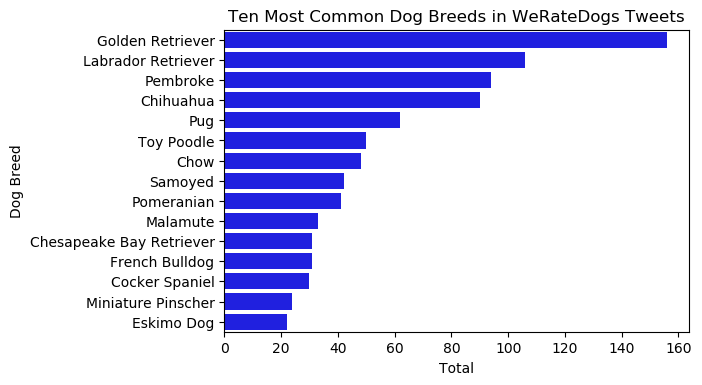

In [99]:
#time to plot with the help of matplotlib and seaborn
plt.figure(dpi=100);
ax = sns.barplot(x='total', y='dog_breed', data=comm_breeds,color='blue');
ax.set_title('Ten Most Common Dog Breeds in WeRateDogs Tweets');
ax.set_ylabel('Dog Breed');
ax.set_xlabel('Total');

3. Which Twitter Version is the most perferred by #WeRateDogs followers?

In [106]:
#first, have the different values of the source column
twitter_archive_master.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [107]:
# sort it
res = twitter_archive_master.source.value_counts(ascending=False)

Text(0.5,1,'Most Preffered Twitter Version by WeRateDogs followers')

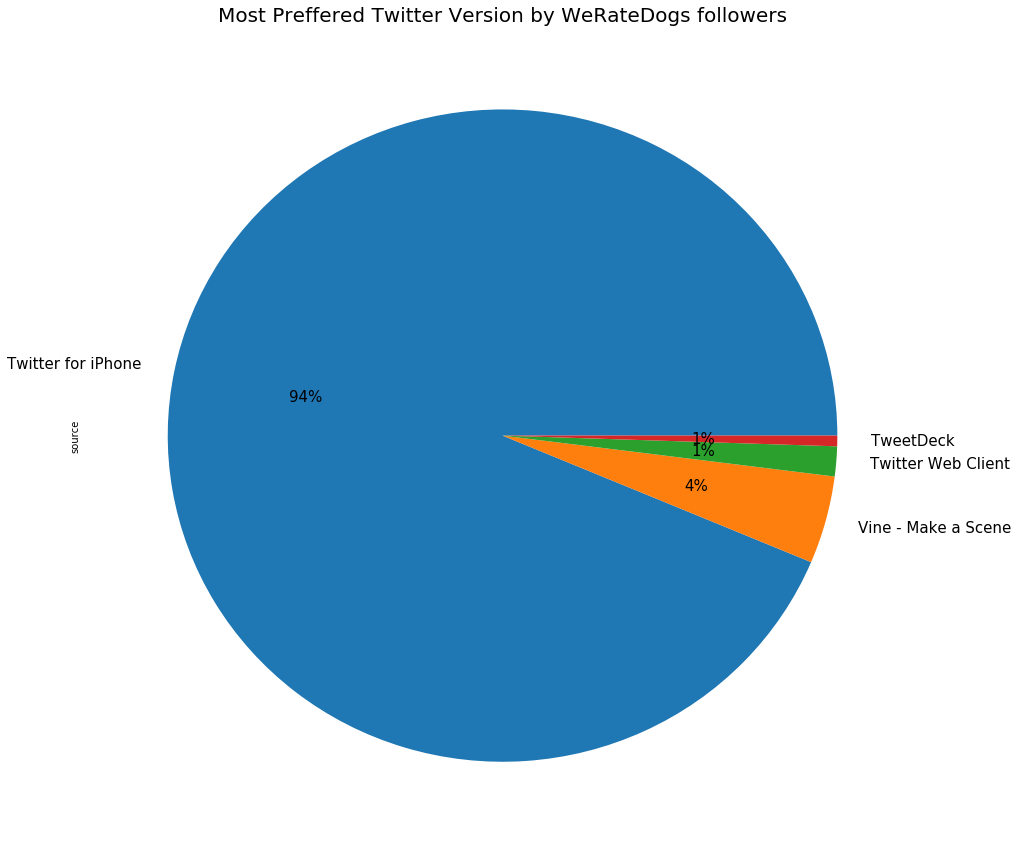

In [115]:
# Plotting it using matplotlib library
res.plot(kind= 'pie', autopct='%1.0f%%', figsize = (15,15), fontsize=15)
plt.title("Most Preffered Twitter Version by WeRateDogs followers", fontsize=20 )

This Plotting made it super obvious that Twitter for iPhone is the most used version for Twitter users of WeRateDogs. (94% of the followers)

### Insights:

At the end there are so many insights and conclusions about this dataset, here are what are related to my wrangling:
1. There are ratings that are below 5 ans surprisengly 0 which weird in comparaison to the concept of WeRateDogs.
2. Pupper & Doggo stages are the most commun of the dogs.
3. Most of the follwers of WeRateDogs are Iphone users.
4. The most commun Dog Breeds in WeRateDogs are Golden Retriever and Labrador Retriever maybe because (after a research I made ) they are playful, yet gentle with children, and they tend to get along well with other pets and strangers.